## <center><u>EDA ON CUISINES DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./Cuisine_rating.csv')
data

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,200.0,100.500,57.879185,1.0,50.75,100.5,150.25,200.0
Area code,200.0,141.060,26.130257,101.0,123.00,135.0,158.00,199.0
YOB,200.0,1984.830,16.809339,1955.0,1971.00,1987.0,2000.00,2009.0
Budget,200.0,3.815,1.056578,1.0,3.00,4.0,5.00,5.0
Food Rating,200.0,3.220,1.411226,1.0,2.00,3.0,5.00,5.0
Service Rating,200.0,3.230,1.526022,1.0,2.00,3.0,5.00,5.0
Overall Rating,200.0,3.225,1.079445,1.0,2.50,3.0,4.00,5.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [5]:
data.columns

Index(['User ID', 'Area code', 'Location', 'Gender', 'YOB', 'Marital Status',
       'Activity', 'Budget', 'Cuisines', 'Alcohol ', 'Smoker', 'Food Rating',
       'Service Rating', 'Overall Rating', 'Often A S'],
      dtype='object')

In [6]:
data.isnull().mean()*100

User ID           0.0
Area code         0.0
Location          0.0
Gender            0.0
YOB               0.0
Marital Status    0.0
Activity          0.0
Budget            0.0
Cuisines          0.0
Alcohol           0.0
Smoker            0.0
Food Rating       0.0
Service Rating    0.0
Overall Rating    0.0
Often A S         0.0
dtype: float64

In [7]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(200, 15)

In [9]:
data.rename(columns={'Alcohol ':'Alcohol','Marital Status':'MaritalStatus','Food Rating':'FoodRating','Service Rating':'ServiceRating','Overall Rating':'OverallRating'},inplace=True)

In [10]:
data.head()


,User ID,Area code,Location,Gender,YOB,MaritalStatus,Activity,Budget,Cuisines,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


#### Adding a new column called 'Age' using YOB column

In [11]:
data['Age']=[(2022-YOB)for YOB in data['YOB']]
data.head()

,User ID,Area code,Location,Gender,YOB,MaritalStatus,Activity,Budget,Cuisines,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,Often A S,Age
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25


#### Dropping User Id and YOB

In [12]:
data.drop(columns=['User ID','YOB'],inplace=True)
data.head()

,Area code,Location,Gender,MaritalStatus,Activity,Budget,Cuisines,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,Often A S,Age
0,153,"Upper East Side,NY",Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
1,123,"St. George,NY",Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
2,122,"Upper West Side,NY",Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
3,153,"Upper East Side,NY",Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
4,129,"Central Park,NY",Male,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25


##### Dropping Area code

In [13]:
data.drop(columns='Area code',inplace=True)
data.head(3)

,Location,Gender,MaritalStatus,Activity,Budget,Cuisines,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,Often A S,Age
0,"Upper East Side,NY",Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
1,"St. George,NY",Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
2,"Upper West Side,NY",Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45


### <u> Univariate Analysis

### Histogram

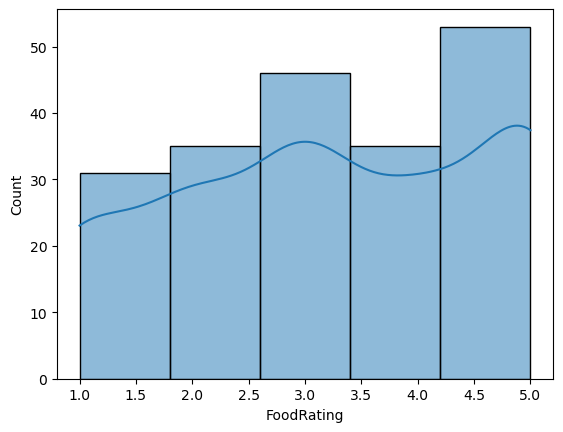

In [14]:
sns.histplot(data=data,x='FoodRating',bins=5,kde=True)
plt.show()

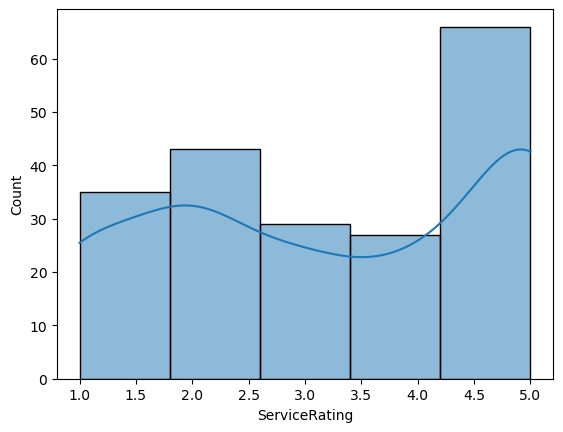

In [15]:
sns.histplot(data=data,x='ServiceRating',bins=5,kde=True)
plt.show()

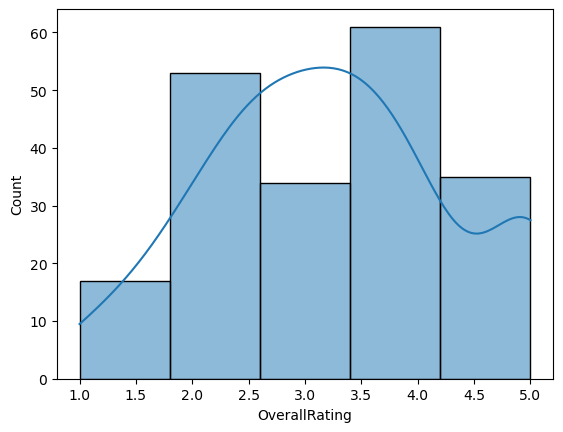

In [16]:
sns.histplot(data=data,x='OverallRating',bins=5,kde=True)
plt.show()

### <u>Multi variate analysis

#### Countplot

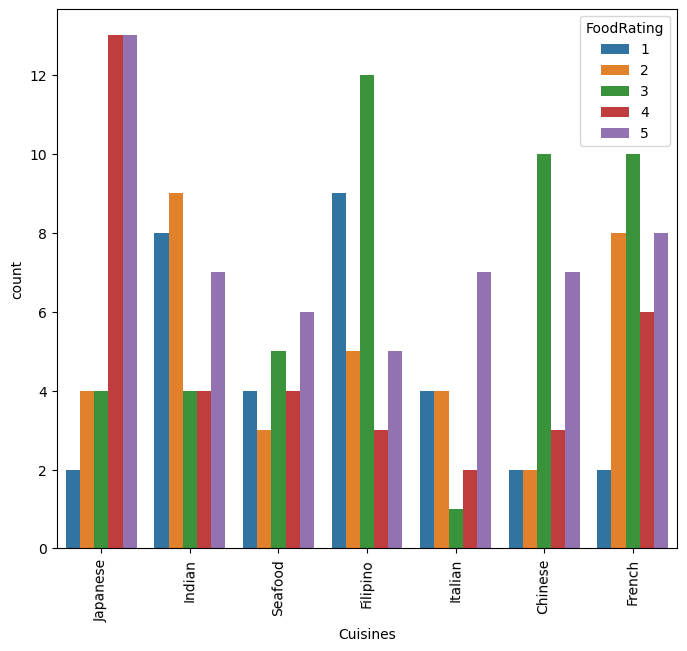

In [17]:
plt.figure(figsize=(8,7))
plt.xticks(rotation=89)
sns.countplot(data=data,x='Cuisines',hue='FoodRating')
plt.show()

#### Japanese Cuisines have high rating

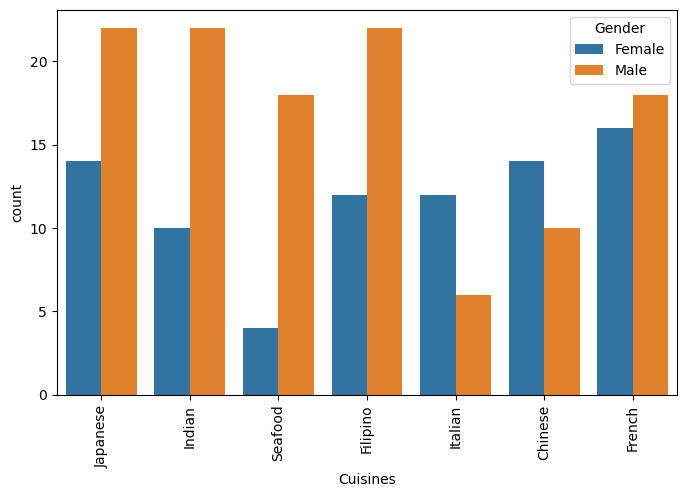

In [18]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.countplot(data=data,x='Cuisines',hue='Gender')
plt.show()

#####  According to plot Males prefer Japanese,Indian,Filipino and Females prefers French Cuisines more

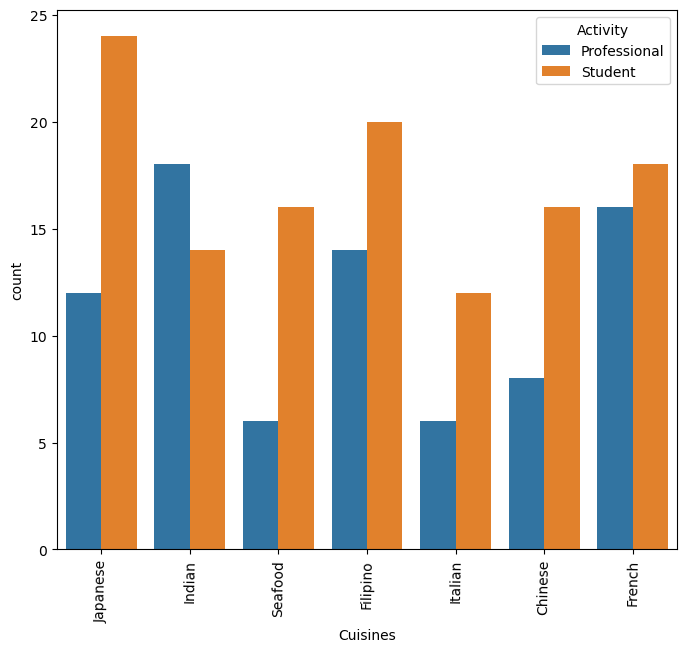

In [19]:
plt.figure(figsize=(8,7))
plt.xticks(rotation=89)
sns.countplot(data=data,x='Cuisines',hue='Activity')

plt.show()

##### From this plot we can understand Students prefer Japanese and Professionals prefer Indian food more

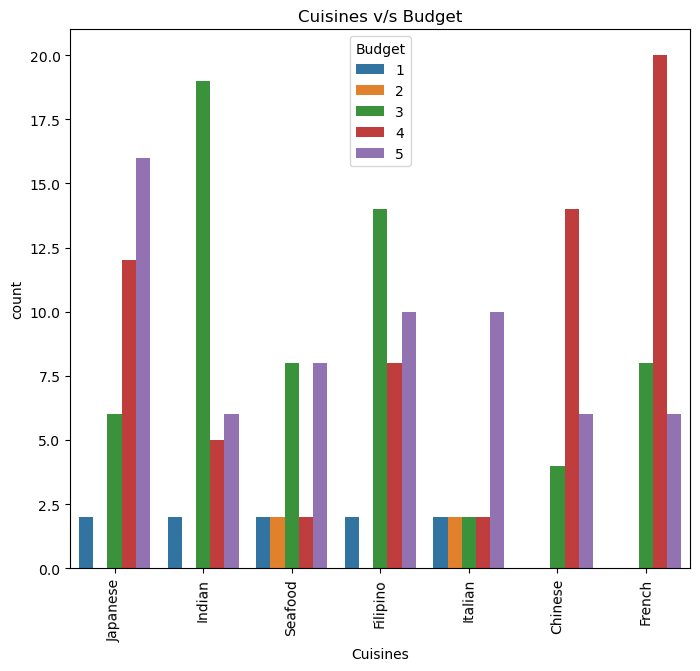

In [20]:
plt.figure(figsize=(8,7))
plt.xticks(rotation=89)
sns.countplot(data=data,x='Cuisines',hue='Budget')
plt.title('Cuisines v/s Budget')
plt.show()

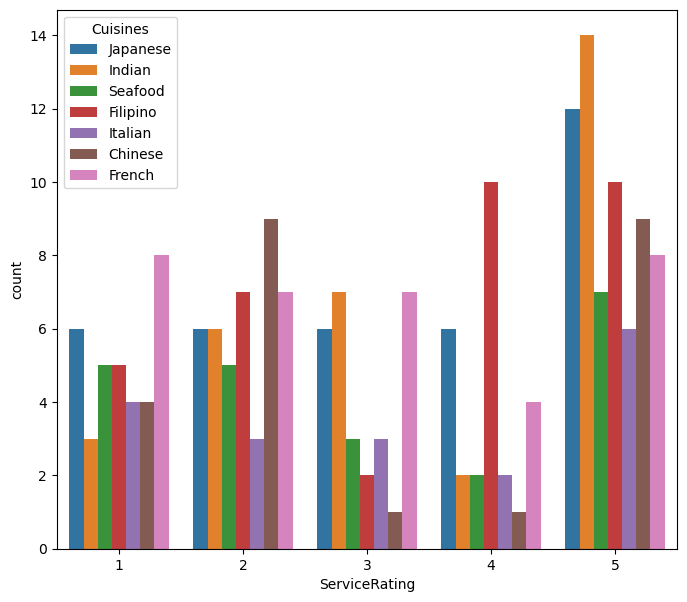

In [21]:
plt.figure(figsize=(8,7))
sns.countplot(data=data,x='ServiceRating',hue='Cuisines')
plt.show()

#### Indian Cuisines have high service rating 

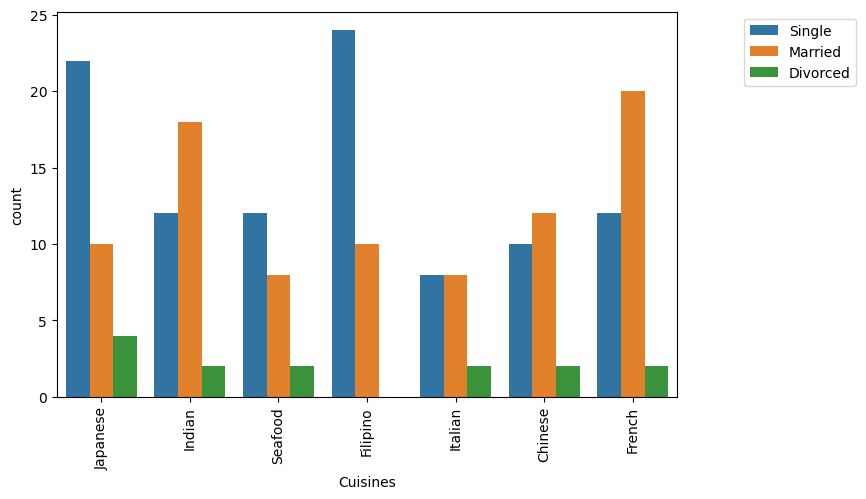

In [22]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.countplot(data=data,x='Cuisines',hue='MaritalStatus')
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

#### Singles consumes more Filipino and Japanese Cuisines more than other 

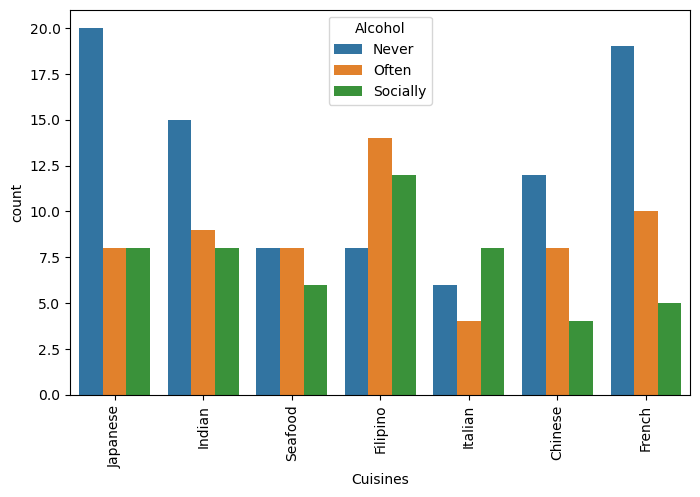

In [23]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.countplot(data=data,x='Cuisines',hue='Alcohol')
plt.show()

##### Alcohol consumer like to have Filipino and Non-Alcoholic people Like Japanese Food

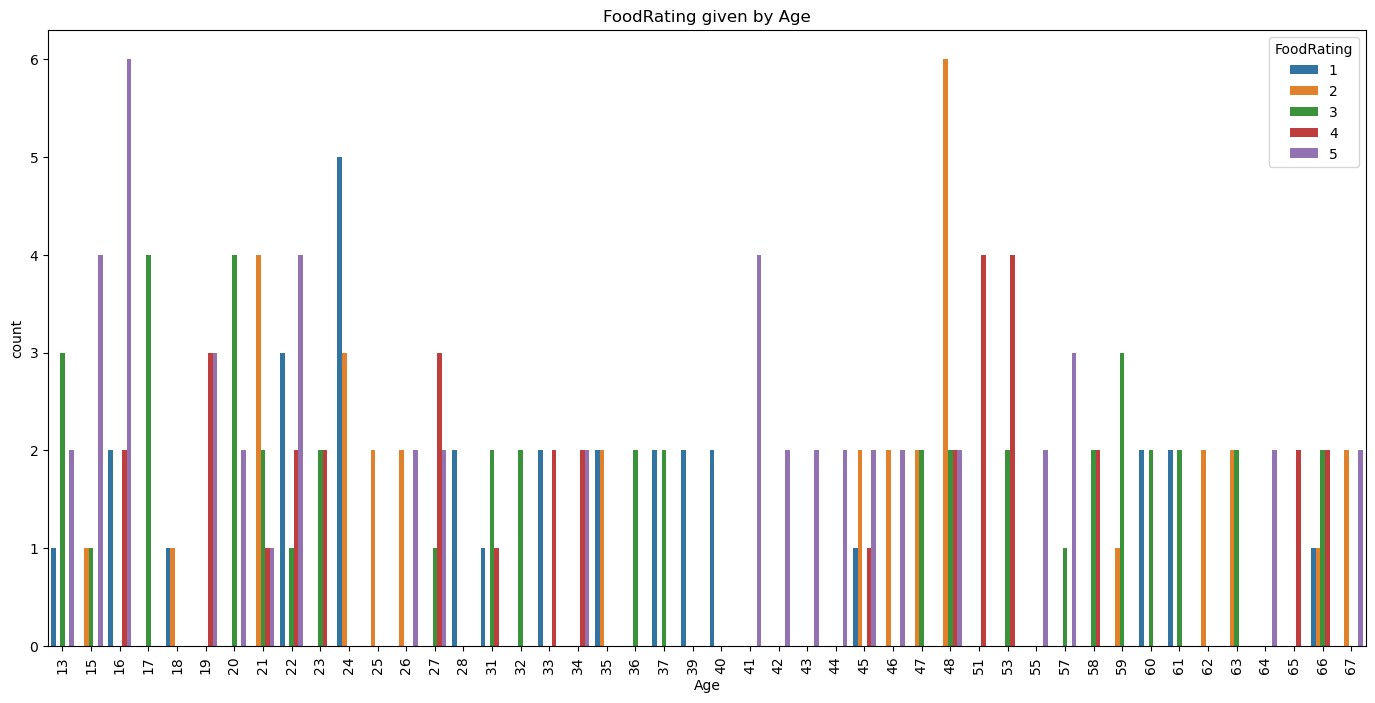

In [24]:
plt.figure(figsize=(17,8))
plt.xticks(rotation=90)
sns.countplot(data=data,x='Age',hue='FoodRating')
plt.title("FoodRating given by Age")
plt.show()

### Barplot

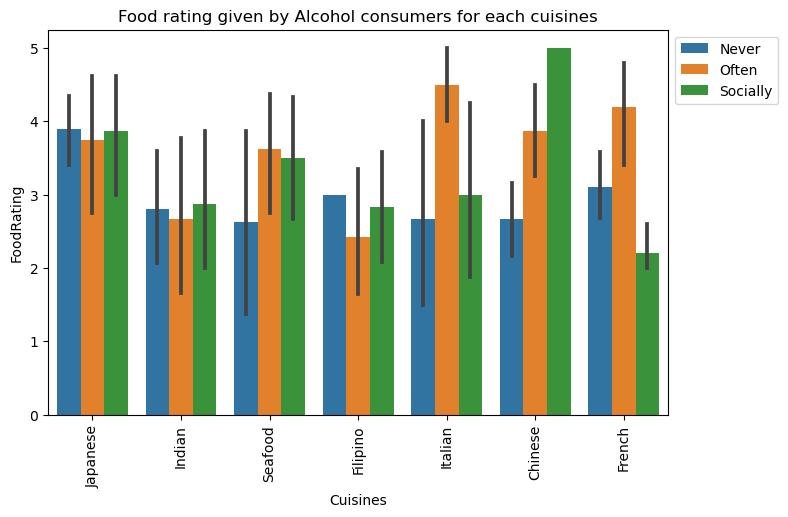

In [25]:

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(data=data,x='Cuisines',y='FoodRating',hue='Alcohol')
plt.title("Food rating given by Alcohol consumers for each cuisines")
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

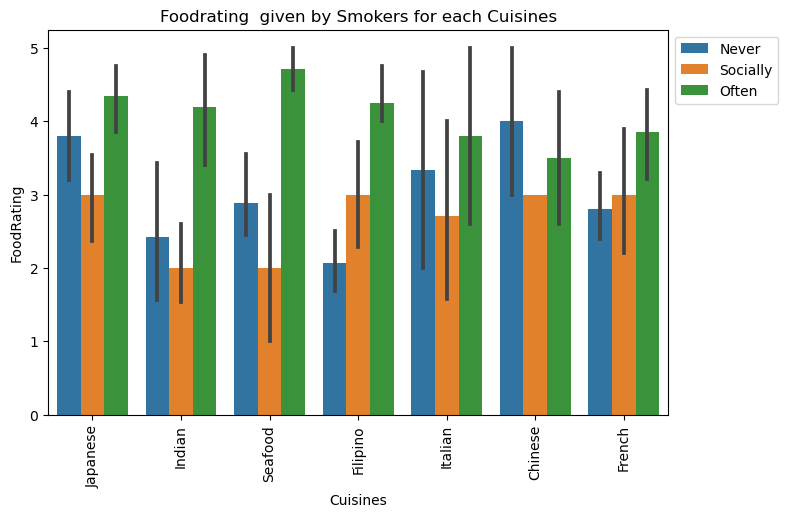

In [26]:

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(data=data,x='Cuisines',y='FoodRating',hue='Smoker')
plt.title("Foodrating  given by Smokers for each Cuisines")
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

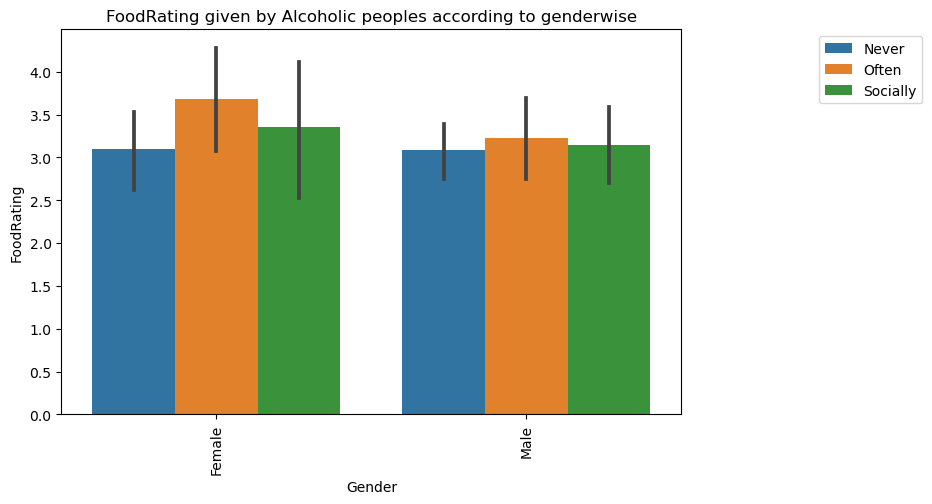

In [27]:

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(data=data,x='Gender',y='FoodRating',hue='Alcohol')
plt.legend(bbox_to_anchor = (1.4, 1))
plt.title("FoodRating given by Alcoholic peoples according to genderwise")
plt.show()

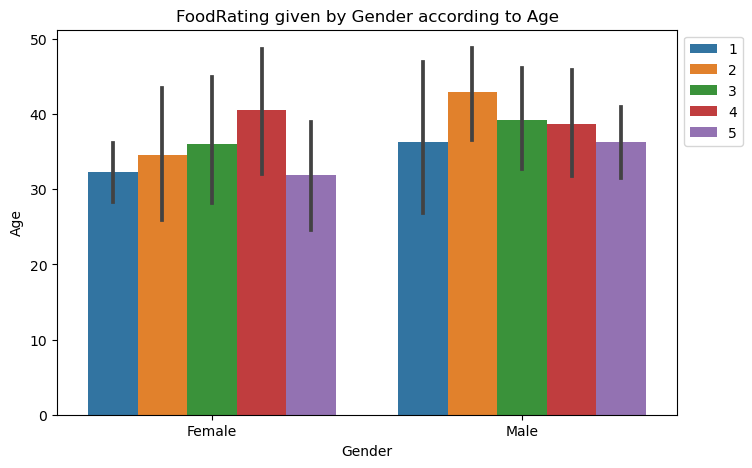

In [28]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=0)
sns.barplot(data=data,x='Gender',y='Age',hue='FoodRating')
plt.legend(bbox_to_anchor = (1, 1))
plt.title('FoodRating given by Gender according to Age')
plt.show()

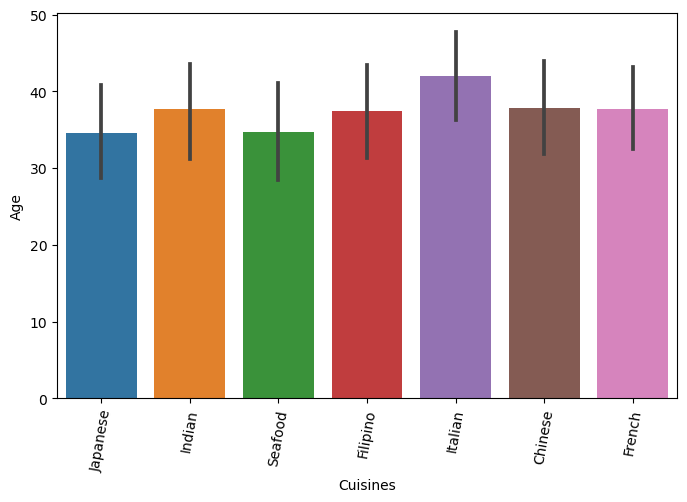

In [29]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=80)
sns.barplot(data=data,x='Cuisines',y='Age')
plt.show()

### LineChart

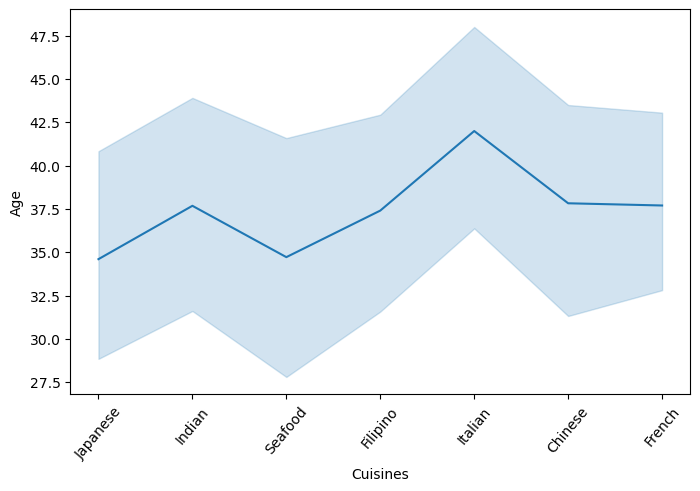

In [30]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=50)
plt.xlabel('Cuisines')
plt.ylabel('Age')
sns.lineplot(data=data,x='Cuisines',y='Age')
plt.show()

##### Italian cuisines are more prefered by peoples in between the age of 40 and 42

### Sorting Function on Location

In [31]:
def sort_function(Location):
    data_loc=data[data.Location==Location]
    data_loc.drop(columns="Location",inplace=True)
    return data_loc

##### Extracting the details of people from "Upper East Side,NY"

In [32]:
UpperEastSide_NY=sort_function('Upper East Side,NY')
UpperEastSide_NY.head(3)

,Gender,MaritalStatus,Activity,Budget,Cuisines,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,Often A S,Age
0,Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
3,Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
7,Female,Single,Professional,3,Filipino,Often,Often,5,2,3.5,Yes,19


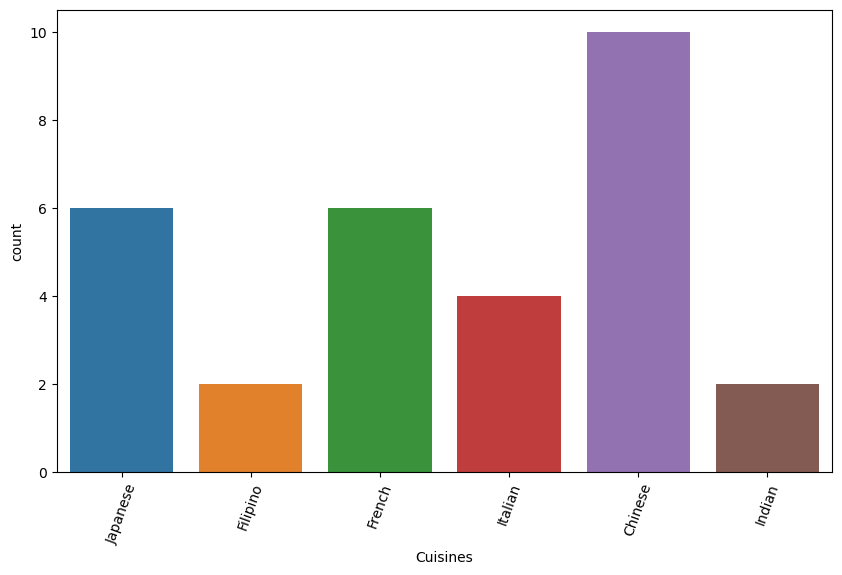

In [33]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=70)
sns.countplot(data=UpperEastSide_NY,x='Cuisines')
plt.show()

#### Peoples in UpperEastSide,NY prefers Chinese Cuisines more

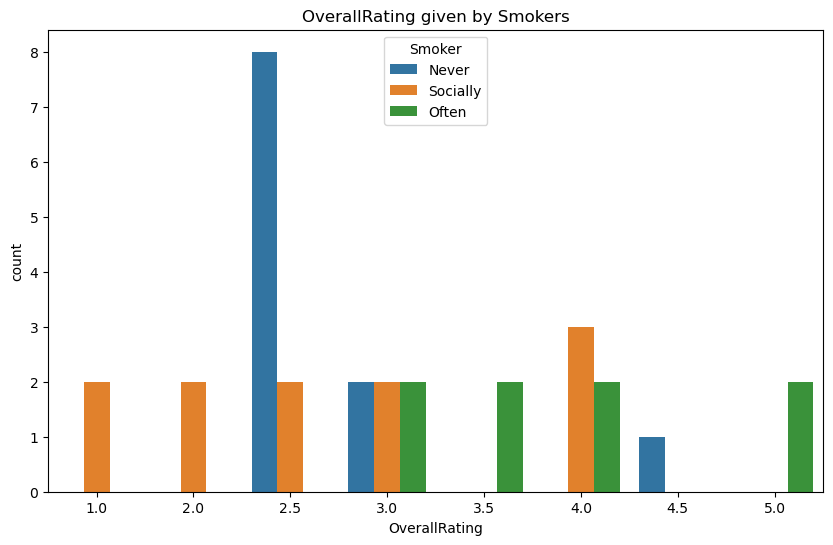

In [34]:

plt.figure(figsize=(10,6))
sns.countplot(data=UpperEastSide_NY,x='OverallRating',hue="Smoker")
plt.title('OverallRating given by Smokers')
plt.show()

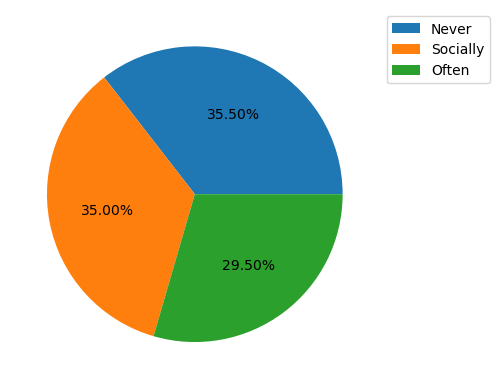

In [35]:
palette_color=sns.color_palette('dark')
plt.pie(data=data,x=data.Smoker.value_counts(), autopct='%1.2f%%')
plt.legend(['Never', 'Socially', 'Often'],bbox_to_anchor = (1, 1))
plt.show()

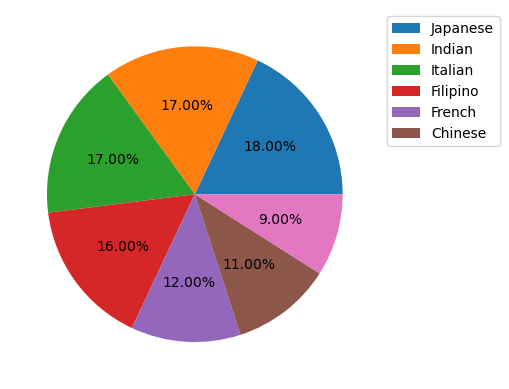

In [36]:
palette_color=sns.color_palette('gnuplot')
plt.pie(data=data,x=data.Cuisines.value_counts(),autopct='%1.2f%%')
plt.legend(['Japanese','Indian','Italian','Filipino','French','Chinese'], bbox_to_anchor = (1, 1))
plt.show()

### <u> ScatterPlot

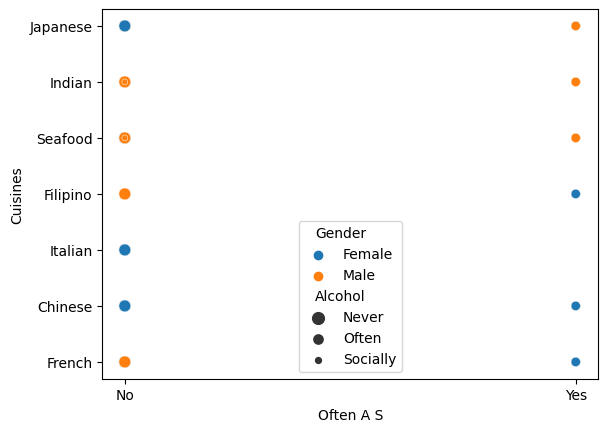

In [37]:
sns.scatterplot(data=data,x='Often A S',y='Cuisines',hue='Gender',size='Alcohol')
plt.show()

### <u>Heatmap

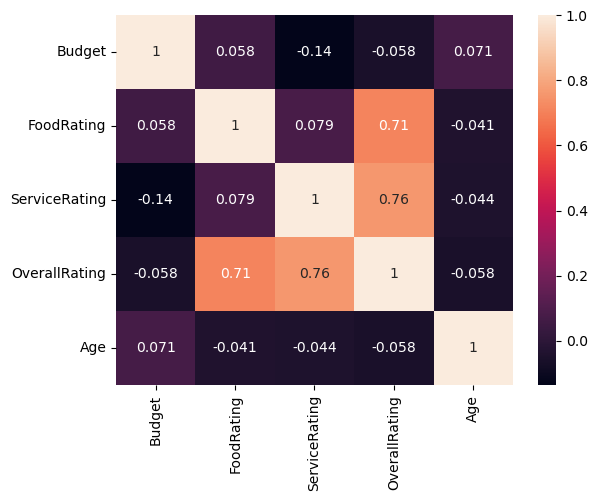

In [38]:
sns.heatmap(data.corr(),annot=True)
plt.show()

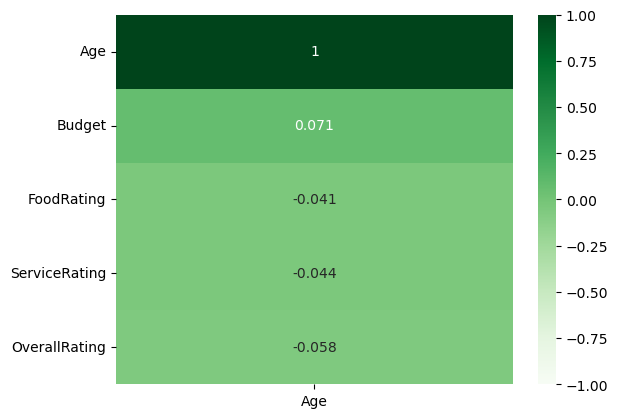

In [39]:
sns.heatmap(data.corr()[['Age']].sort_values(by='Age',ascending=False),vmax=1,vmin=-1,annot=True,cmap='Greens')
plt.show()

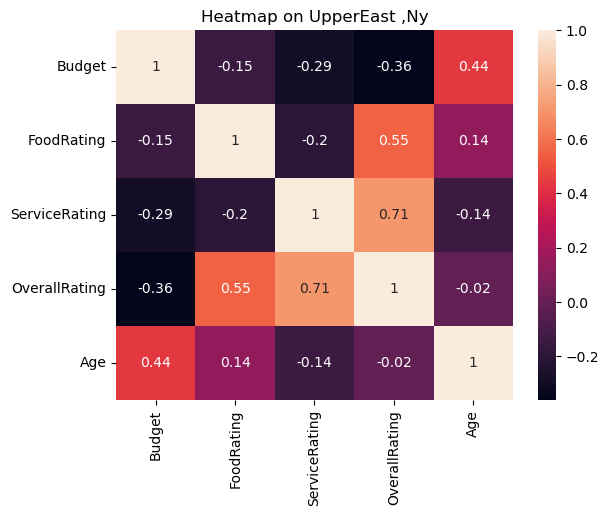

In [40]:
sns.heatmap(UpperEastSide_NY.corr(),annot=True)
plt.title('Heatmap on UpperEast ,Ny')
plt.show()

##### heatmap using data of UpperEastSide_NY

### Violin plot

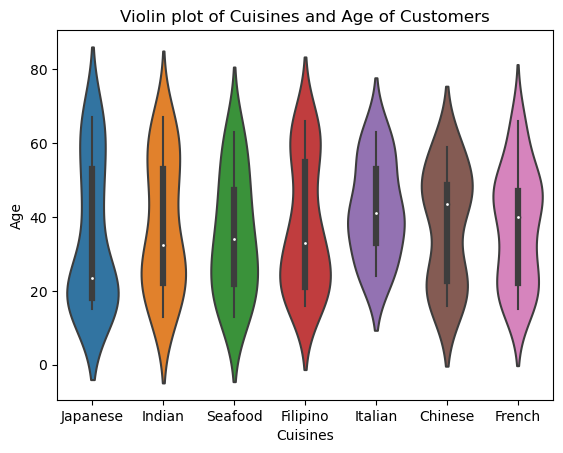

In [41]:
sns.violinplot(data=data, y='Age',x='Cuisines')
plt.title('Violin plot of Cuisines and Age of Customers')
plt.show()


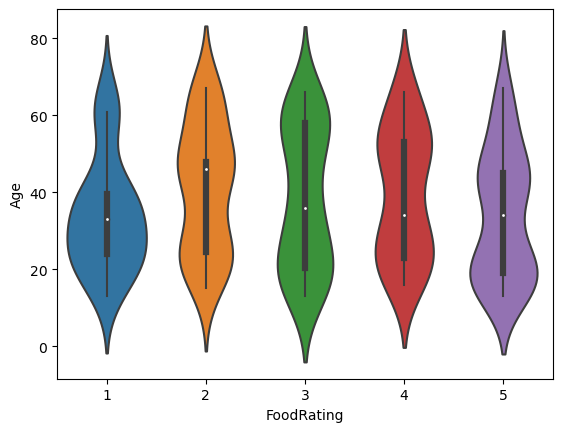

In [42]:
sns.violinplot(data=data,y='Age',x='FoodRating')
plt.show()

### Pairplot

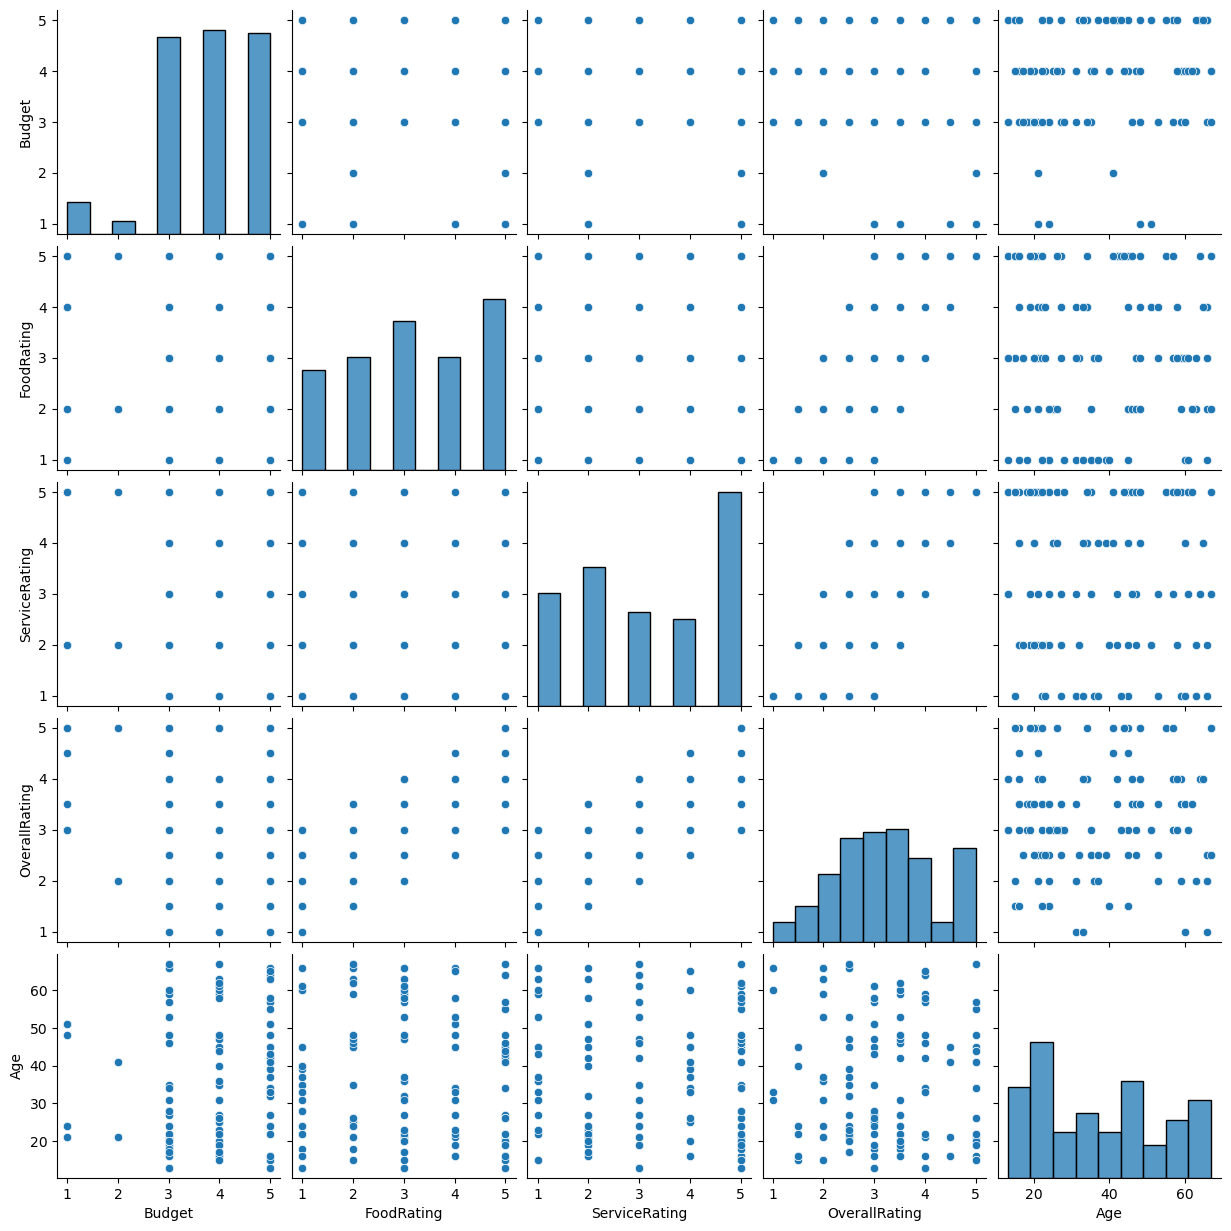

In [43]:
sns.pairplot(data=data)
plt.show()

### <u><b>Sorting Japanese Cuisine

In [44]:
def sort_function(Cuisines):
    data_food=data[data.Cuisines==Cuisines]
    data_food.drop(columns="Cuisines",inplace=True)
    return data_food

In [45]:
Japanese_food=sort_function('Japanese')
Japanese_food.head()

,Location,Gender,MaritalStatus,Activity,Budget,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,Often A S,Age
0,"Upper East Side,NY",Female,Single,Professional,3,Never,Never,5,4,4.5,No,16
3,"Upper East Side,NY",Female,Married,Professional,5,Never,Socially,3,1,2.0,No,66
17,"Upper East Side,NY",Male,Single,Student,3,Often,Often,1,5,3.0,Yes,18
25,"St. George,NY",Male,Single,Professional,3,Never,Socially,4,3,3.5,No,53
34,"Central Park,NY",Male,Divorced,Student,1,Socially,Often,5,5,5.0,No,21


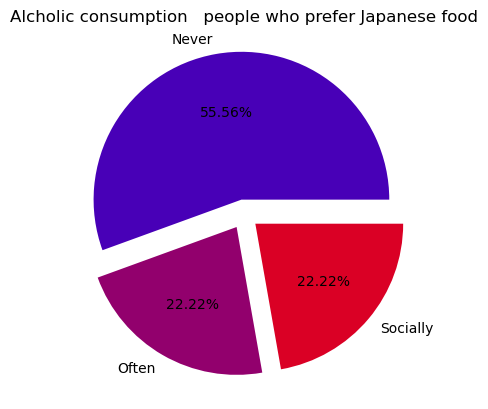

In [46]:
palette_color=sns.color_palette('brg')
plt.pie(data=Japanese_food,x=Japanese_food.Alcohol.value_counts(),explode=[0.1,0.1,0.1],colors=palette_color,autopct='%0.2f%%',labels=['Never', 'Often', 'Socially'])
plt.title("Alcholic consumption   people who prefer Japanese food")
plt.show()

### <u>CatPlot

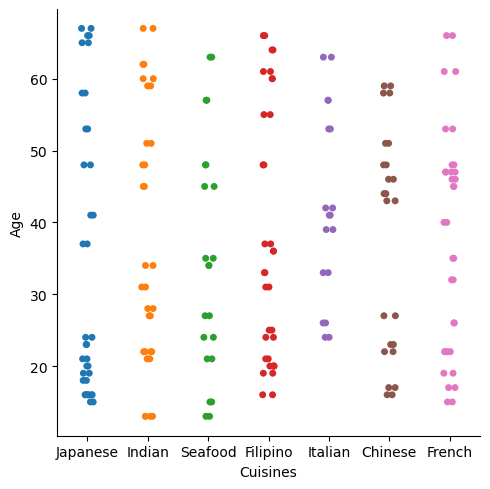

In [47]:
sns.catplot(data=data,x='Cuisines',y='Age')

plt.show()

### <u>Regplot

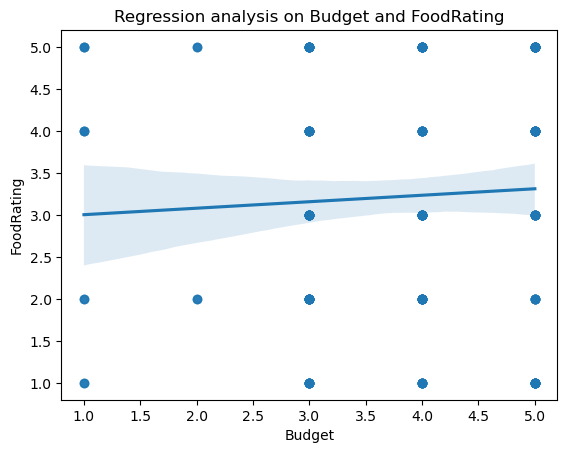

In [48]:
sns.regplot(data=data,x='Budget',y='FoodRating')
plt.title('Regression analysis on Budget and FoodRating')
plt.show()

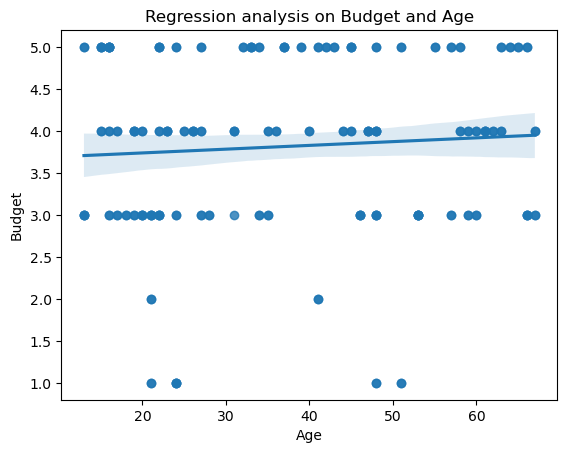

In [49]:
sns.regplot(data=data,x='Age',y='Budget')
plt.title('Regression analysis on Budget and Age')
plt.show()

### <u>Relplot

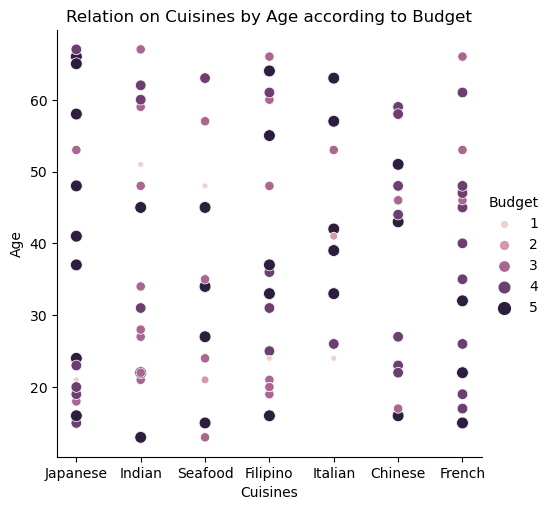

In [50]:
sns.relplot(data=data,x='Cuisines',y='Age',size='Budget',hue='Budget')
plt.title('Relation on Cuisines by Age according to Budget')
plt.show()

### <u>Swarmplot

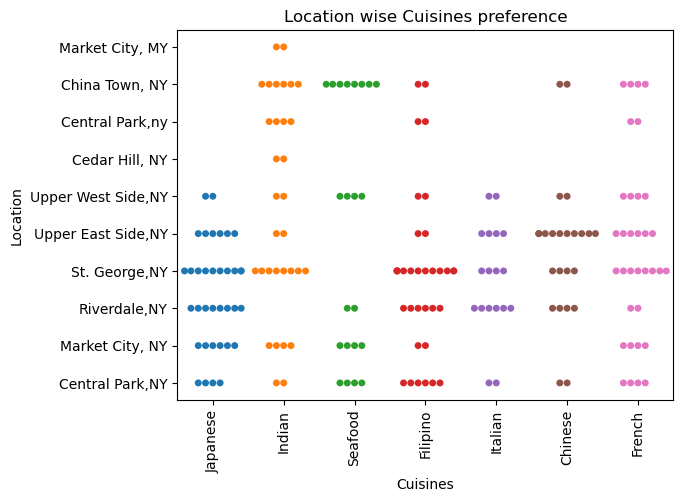

In [51]:
sns.swarmplot(data = data, x = 'Cuisines', y= 'Location')
plt.xticks(rotation=90)
plt.title('Location wise Cuisines preference')
plt.show()
